### Feature Selection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.preprocessing import StandardScaler, scale
from sklearn.metrics import accuracy_score as acs

In [3]:
hdb_resale_prices = pd.read_csv("final_hdb_resale_prices.csv")
hdb_resale_prices.head()

,Unnamed: 0,month,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,Latitude,Longitude,...,year,no.of bto,resale application,demand ratio,remaining_lease_months,address,Distance to nearest MRT,Distance to CBD,Distance to nearest mall,isMatureEstate
0,0,2017-01,ANG MO KIO,3 ROOM,2,67.0,New Generation,250000.0,1.370943,103.837975,...,2017,14464,20894.0,1.02,727,108 ANG MO KIO AVE 4,166.825954,9696.234644,896.944633,1
1,1,2017-01,ANG MO KIO,3 ROOM,2,67.0,New Generation,262000.0,1.380709,103.835368,...,2017,14464,20894.0,1.02,749,602 ANG MO KIO AVE 5,532.155055,10808.143550,1527.724531,1
2,2,2017-01,ANG MO KIO,3 ROOM,5,68.0,New Generation,265000.0,1.366201,103.857201,...,2017,14464,20894.0,1.02,744,465 ANG MO KIO AVE 10,945.375055,9087.920590,880.143181,1
3,3,2017-01,ANG MO KIO,3 ROOM,2,67.0,New Generation,265000.0,1.381041,103.835132,...,2017,14464,20894.0,1.02,749,601 ANG MO KIO AVE 5,498.419646,10848.697720,1571.446900,1
4,4,2017-01,ANG MO KIO,3 ROOM,2,68.0,New Generation,275000.0,1.376807,103.842018,...,2017,14464,20894.0,1.02,756,150 ANG MO KIO AVE 5,636.982785,10284.079570,695.573226,1


In [4]:
hdb_resale_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143259 entries, 0 to 143258
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                143259 non-null  int64  
 1   month                     143259 non-null  object 
 2   town                      143259 non-null  object 
 3   flat_type                 143259 non-null  object 
 4   storey_range              143259 non-null  int64  
 5   floor_area_sqm            143259 non-null  float64
 6   flat_model                143259 non-null  object 
 7   resale_price              143259 non-null  float64
 8   Latitude                  143259 non-null  float64
 9   Longitude                 143259 non-null  float64
 10  cpi_multiplier            143259 non-null  float64
 11  cpi_adjusted_price        143259 non-null  float64
 12  year                      143259 non-null  int64  
 13  no.of bto                 143259 non-null  i

In [5]:
hdb_resale_prices = hdb_resale_prices[hdb_resale_prices['year'] != 2017]
hdb_resale_prices = hdb_resale_prices[hdb_resale_prices['year'] != 2018]
hdb_resale_prices = hdb_resale_prices[hdb_resale_prices['year'] != 2019]
hdb_resale_prices = hdb_resale_prices[hdb_resale_prices['year'] != 2023]
hdb_resale_prices

,Unnamed: 0,month,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,Latitude,Longitude,...,year,no.of bto,resale application,demand ratio,remaining_lease_months,address,Distance to nearest MRT,Distance to CBD,Distance to nearest mall,isMatureEstate
63275,63275,2020-01,ANG MO KIO,3 ROOM,5,73.0,New Generation,265000.0,1.365445,103.842715,...,2020,7314,26436.0,1.13,667,208 ANG MO KIO AVE 1,908.970521,9026.295266,775.593122,1
63276,63276,2020-01,ANG MO KIO,3 ROOM,20,70.0,Model A,470000.0,1.365561,103.845169,...,2020,7314,26436.0,1.13,1100,307C ANG MO KIO AVE 1,687.185319,9015.122154,561.028714,1
63277,63277,2020-01,ANG MO KIO,3 ROOM,2,73.0,New Generation,230000.0,1.365098,103.847381,...,2020,7314,26436.0,1.13,676,319 ANG MO KIO AVE 1,586.980690,8949.443986,489.978660,1
63278,63278,2020-01,ANG MO KIO,3 ROOM,5,73.0,New Generation,280000.0,1.366197,103.841505,...,2020,7314,26436.0,1.13,663,216 ANG MO KIO AVE 1,800.631299,9123.690385,806.304304,1
63279,63279,2020-01,ANG MO KIO,3 ROOM,8,68.0,New Generation,220000.0,1.372032,103.857625,...,2020,7314,26436.0,1.13,708,556 ANG MO KIO AVE 10,927.322849,9734.443856,1059.121690,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141104,141104,2022-12,YISHUN,EXECUTIVE,8,146.0,Maisonette,845000.0,1.425404,103.844843,...,2022,20064,30370.0,1.14,780,355 YISHUN RING RD,1182.415251,15623.766720,908.910361,0
141105,141105,2022-12,YISHUN,EXECUTIVE,8,142.0,Apartment,782000.0,1.421335,103.837437,...,2022,20064,30370.0,1.14,766,643 YISHUN ST 61,661.035324,15234.077610,568.606554,0
141106,141106,2022-12,YISHUN,EXECUTIVE,8,142.0,Apartment,770888.0,1.421335,103.837437,...,2022,20064,30370.0,1.14,766,643 YISHUN ST 61,661.035324,15234.077610,568.606554,0
141107,141107,2022-12,YISHUN,EXECUTIVE,11,146.0,Maisonette,788000.0,1.421334,103.836318,...,2022,20064,30370.0,1.14,768,606 YISHUN ST 61,573.471701,15246.853760,668.020144,0


In [6]:
columns_to_drop = ['Unnamed: 0','month','town','flat_type','flat_model','address','Latitude','Longitude','cpi_multiplier','year']
hdb_resale_prices = hdb_resale_prices.drop(columns=columns_to_drop)


In [7]:
hdb_resale_prices['cpi_adjusted_price_per_sqm'] = hdb_resale_prices["cpi_adjusted_price"] / hdb_resale_prices["floor_area_sqm"]

In [8]:
 hdb_resale_prices = hdb_resale_prices.drop(columns=['cpi_adjusted_price','resale_price'])
    

In [9]:
hdb_resale_prices.tail()

,storey_range,floor_area_sqm,no.of bto,resale application,demand ratio,remaining_lease_months,Distance to nearest MRT,Distance to CBD,Distance to nearest mall,isMatureEstate,cpi_adjusted_price_per_sqm
141104,8,146.0,20064,30370.0,1.14,780,1182.415251,15623.76672,908.910361,0,6158.429452
141105,8,142.0,20064,30370.0,1.14,766,661.035324,15234.07761,568.606554,0,5859.823380
141106,8,142.0,20064,30370.0,1.14,766,661.035324,15234.07761,568.606554,0,5776.556939
141107,11,146.0,20064,30370.0,1.14,768,573.471701,15246.85376,668.020144,0,5743.008767
141108,5,142.0,20064,30370.0,1.14,768,573.471701,15246.85376,668.020144,0,5545.101408


In [10]:
hdb_resale_prices.describe()

,storey_range,floor_area_sqm,no.of bto,resale application,demand ratio,remaining_lease_months,Distance to nearest MRT,Distance to CBD,Distance to nearest mall,isMatureEstate,cpi_adjusted_price_per_sqm
count,77834.000000,77834.000000,77834.000000,77834.000000,77834.000000,77834.000000,77834.000000,77834.000000,77834.000000,77834.000000,77834.000000
mean,8.866922,98.424730,13989.294216,27763.372459,1.052323,899.000039,845.200570,12235.943008,654.394035,0.396459,5369.706969
std,6.116736,23.134662,5057.660156,1860.110229,0.108772,172.516234,466.462492,4325.466083,369.353092,0.489165,1458.075585
min,2.000000,51.000000,7314.000000,26436.000000,0.910000,516.000000,31.759538,527.673362,0.000708,0.000000,2083.576119
25%,5.000000,84.000000,7314.000000,26436.000000,0.910000,755.000000,481.807434,9614.007911,383.961774,0.000000,4399.147059
50%,8.000000,93.000000,13756.000000,26436.000000,1.130000,899.000000,759.557518,13202.489430,583.578305,0.000000,5083.842222
75%,11.000000,113.000000,20064.000000,30370.000000,1.140000,1092.000000,1128.696508,15150.006070,864.744147,1.000000,5944.059310
max,50.000000,243.000000,20064.000000,30370.000000,1.140000,1173.000000,3646.118783,23064.390350,3999.391261,1.000000,15674.862366


Extra Trees Regressor can also be used for feature selection. It can be used to identify the most important variables that contribute to the prediction of the target variable.

<AxesSubplot:>

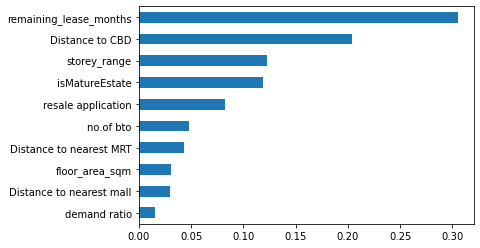

In [11]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()  
model.fit(hdb_resale_prices.iloc[:,0:10],hdb_resale_prices.iloc[:,-1]  )

feat_importances = pd.Series(model.feature_importances_,index = hdb_resale_prices.columns[0:10])
feat_importances=feat_importances.sort_values(ascending=True)
feat_importances.plot(kind='barh',fontsize =10)

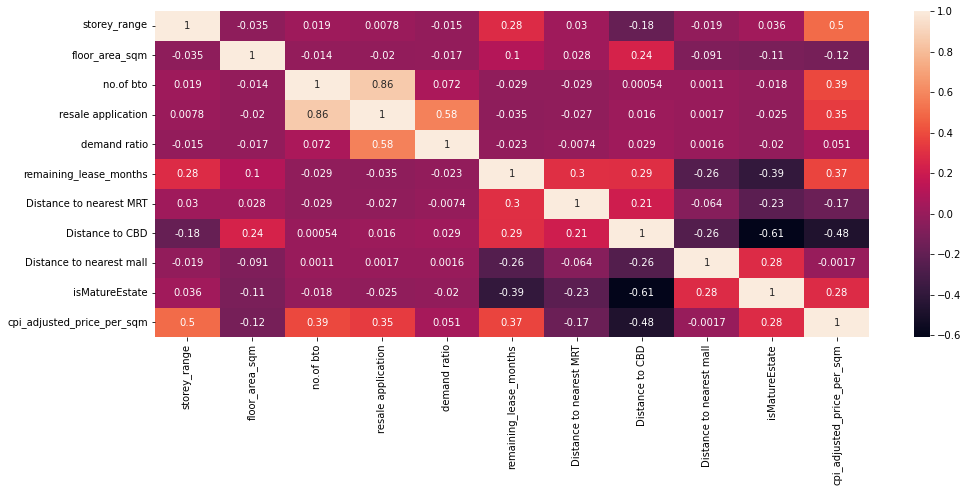

In [12]:
plt.figure(figsize=(16, 6))
corr_df = hdb_resale_prices.corr()
hm = sns.heatmap(corr_df , annot=True)


- Demand ratio play low importance in determining cpi adjusted price per sqm 

- Lat and long are dropped as it is just the location of the flat

- cpi multiplier is not needed as it is used to tabulate other information 

- year of resale and distance to CBD has low importance. 

In [13]:
# cols_to_drops=['demand ratio','Distance to nearest mall','Latitude','Longitude','cpi_multiplier','year','Distance to CBD']
cols_to_drops=['demand ratio','Distance to nearest mall']
hdb_model_data = hdb_resale_prices.drop(columns=cols_to_drops)
hdb_model_data

,storey_range,floor_area_sqm,no.of bto,resale application,remaining_lease_months,Distance to nearest MRT,Distance to CBD,isMatureEstate,cpi_adjusted_price_per_sqm
63275,5,73.0,7314,26436.0,667,908.970521,9026.295266,1,3619.754795
63276,20,70.0,7314,26436.0,1100,687.185319,9015.122154,1,6695.082857
63277,2,73.0,7314,26436.0,676,586.980690,8949.443986,1,3141.673973
63278,5,73.0,7314,26436.0,663,800.631299,9123.690385,1,3824.646575
63279,8,68.0,7314,26436.0,708,927.322849,9734.443856,1,3226.041176
...,...,...,...,...,...,...,...,...,...
141104,8,146.0,20064,30370.0,780,1182.415251,15623.766720,0,6158.429452
141105,8,142.0,20064,30370.0,766,661.035324,15234.077610,0,5859.823380
141106,8,142.0,20064,30370.0,766,661.035324,15234.077610,0,5776.556939
141107,11,146.0,20064,30370.0,768,573.471701,15246.853760,0,5743.008767


In [14]:
hdb_model_data.to_csv('hdb_model_data_regression.csv',index=False)